In [2]:
# Saving settings
%autosave 180
%load_ext autoreload
%autoreload 2

# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

# Computing
import numpy as np
from scipy import io
from scipy import stats
import sys

# Files
import pandas as pd
import os
import glob
import pickle
import h5py
#!pip install statsmodels
#import seaborn as sns

from utils_local import Animal, ProjectionDecoder



Autosaving every 180 seconds
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Select the directory with the input data
main_dir = "/media/cat/4TB/donato/nathalie"
animal_id = "DON-007417"
animal_id = "DON-007050"
session_id = "FS11"

#
ani = Animal(main_dir,
              animal_id,
              session_id)



... processing location csv
...processing neural data...
bin upphase:  (357, 36025)
All DLC locations:  (36000, 2)
Final locations shape:  (36000, 2)
bin upphase:  (357, 36025)
(36000, 357)
1364.0284 1376.2297
DONE
...done...


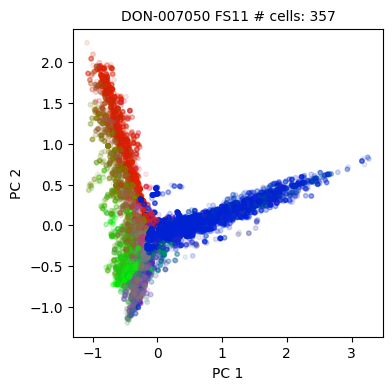

In [5]:
# visualize PCA projection on all data
dec = ProjectionDecoder()
dec.fit(ani.f_filtered, ani.locs_partitioned, 50)
X_pca = dec.transform_pca(ani.f_filtered)

# plot
dec.show_pca(X_pca, ani)

# save figure as .pdf
fname_out = os.path.join('/home/cat/pca.pdf')
plt.savefig(fname_out, dpi=300)


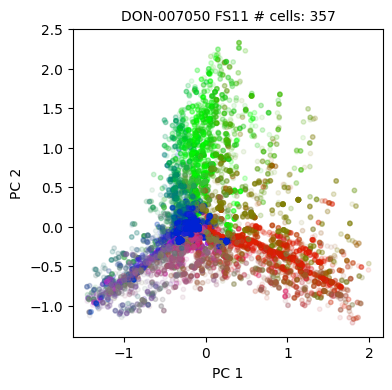

In [6]:
# visualize PCA projection on moving data only
ani.speed_threshold = 4.0
ani.compute_speed()

# decode on moving data only; so we use the id
dec = ProjectionDecoder()
dec.fit(ani.f_filtered[ani.idx_mob], ani.locs_partitioned[ani.idx_mob], 50)
X_pca = dec.transform_pca(ani.f_filtered)

dec.show_pca(X_pca, ani)
plt.savefig(fname_out, dpi=300)


In [ ]:
# TODO Other dim reduction methods